# Digits Image (MNIST Dataset) Classification using CNNs  
**Classify the images of digits (0, 1, 2, etc.) correctly using Convolutional Neural Networks**  
**Reference: https://www.kaggle.com/c/digit-recognizer/kernels**

## Step 1: Verify that all requires libraries can be imported

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers, models
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Step 2: Load MNIST dataset from the Internet  
**The path for MNIST dataset is already in the Keras datasets library**  
**The mnist.load_data() module automatically returns the four sets of data we need** 

In [0]:
( train_images, train_labels ), ( validation_images, validation_labels ) = mnist.load_data()

## Step 3: Check how many images are in the Training set and Validation set
** What is the dimension of each image?**

In [3]:
print("Training dataset:")
print(train_images.shape)
print(train_labels.shape)
print('Validation dataset:')
print(validation_images.shape)
print(validation_labels.shape)

Training dataset:
(60000, 28, 28)
(60000,)
Validation dataset:
(10000, 28, 28)
(10000,)


## Step 4: Visualize a random image (for example, 0th image) in the train dataset

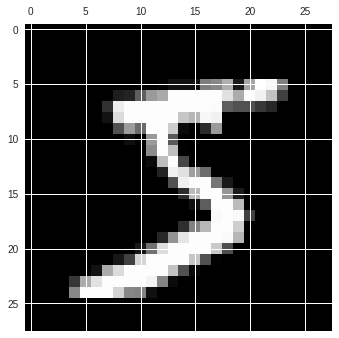

In [4]:
plt.matshow( train_images[0], cmap = 'gray')
plt.show()

## Step 5: Verify that the "true" label is correct

In [5]:
print(train_labels[0])

5


## Step 6: Reformat the datasets so that we can feed the data to the model we will build  
** A 2D CNN model will accept a 4D input data - \[number of data, height, width, depth of image]**  
** So, we will reshape each image of dimension \[28, 28] to \[28, 28, 1]**   
** Also, the image intensities can be anywhere from 0 to 255 - we want these numbers to be between 0 and 1 **

In [0]:
train_images = train_images.reshape( ( 60000, 28, 28, 1 ) )
train_images = train_images.astype( 'float32' ) / 255
validation_images = validation_images.reshape( ( 10000, 28, 28, 1 ) )
validation_images = validation_images.astype( 'float32' ) / 255

## Step 7: Our network will have 10 output nodes, we need to convert our labels accordingly
** Don't you rerun this more than once**   
** Verify that the shape of train_labels is (60000, 10) **  

In [7]:
print("Before:")
print( train_labels.shape )
print( train_labels[0] )
train_labels = to_categorical( train_labels )
validation_labels = to_categorical( validation_labels )
print("After:")
print( train_labels.shape )
print( train_labels[0] )

Before:
(60000,)
5
After:
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Step 8: Create a neural network with following architecture:  
**- The first layer has 16 filters (kernels), each of size 3x3**  
**- The third layer has 4 filters (kernels), each of size 3x3**  
**- The last layer is a set of 10 neurons - one for each of the 10 digit labels**  

#### Notes:
**- You could use just the Dense layers to achieve digit identification - CNNs usually deliver better accuracy**  
**- Conv2D is the convolutional layer - Conv2D( filters, (filter_height, filter_width), (activation), (input_shape) )**  
**- The filter will move through the image pixel by pixel (or "convolves") around the image picking up values - output of: 26 x 26**  
**- The last layer - 10 neurons for digits between 0 and 9 - Each neuron will contain values be between 0 - 1 and all of the values will sum to 1**  
**- We have a probability for a digit prediction - the highest probability will be the model's prediction for the digit**  

In [8]:
model = models.Sequential()
model.add( layers.Conv2D( 16, ( 3, 3 ), activation = 'sigmoid', input_shape = train_images[0, :, :, :].shape ) )
model.add( layers.Conv2D( 4, ( 3, 3 ), activation = 'sigmoid' ) )
model.add( layers.Flatten() )
model.add( layers.Dense( 10, activation = 'softmax' ) )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 4)         580       
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                23050     
Total params: 23,790
Trainable params: 23,790
Non-trainable params: 0
_________________________________________________________________


## Step 9: Compile the model and Do the training

In [9]:
model.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
model.fit( train_images, train_labels, epochs = 1, batch_size = 256 )

Epoch 1/1
60000/60000 [==============================] - 41s 686us/step - loss: 1.6491 - acc: 0.4396


## Step 10: Evaluate the model on the test validation set

In [10]:
validation_loss, validation_acc = model.evaluate( validation_images, validation_labels )
print( 'validation_acc:', validation_acc )

10000/10000 [==============================] - 3s 307us/step
validation_acc: 0.7906


## Step 11: Look into what the model actually predicted
** An example of what the model has predicted and comparison with the true classes**


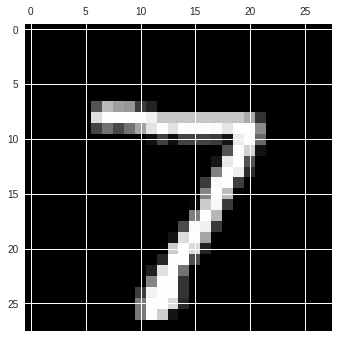

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [11]:
plt.matshow( validation_images[0, :, :, 0], cmap = 'gray' )
plt.show()
print( validation_labels[0] )

** Visualizing the predictions predictions on the unseen data - this is going to show us how the model is predicting the images**  
**  The output is an array of values where each value is associated to a digit**

In [18]:
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.7f}".format(x)})

predictions = model.predict( validation_images )
print( predictions[0] )

[0.0000092 0.0000096 0.0000216 0.0002000 0.0003006 0.0003302 0.0000044
 0.9986088 0.0000202 0.0004954]


** After rounding we can see the output of the prediction**  

In [13]:
print( predictions[0].round() )

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Step 12: How can the model's performance be improved?
- Use GPU for training
- Increase the number of epochs
- Increase the number of filters in the first layer, and subsequent layers
- Add more layers into the neural networks 
- Increase the number of Conv2D layers (i.e. add extra layers)
- What is the baseline accuracy (i.e. accuracy of a random model)?